In [116]:
%matplotlib inline
import numpy as np
from hagelslag.processing import EnhancedWatershed, ObjectMatcher, centroid_distance, shifted_centroid_distance
from hagelslag.processing.tracker import extract_storm_objects, track_storms
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.ndimage import find_objects
from matplotlib.colors import ListedColormap

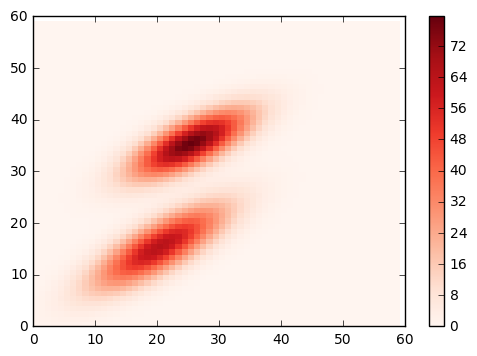

In [104]:
g_len = 60
grid = np.zeros((2, g_len, g_len))
labels = np.zeros((2, g_len, g_len), dtype=int)
x, y = np.meshgrid(np.arange(g_len), np.arange(g_len))
coords = np.dstack((x, y))
mvn1 = multivariate_normal(mean=[20, 15], cov=np.array([[50, 30], [30, 30]]))
mvn2 = multivariate_normal(mean=[25, 35], cov=np.array([[40, 20], [20, 20]]))
grid[0] += 10000 * mvn1.pdf(coords) + 10000 * mvn2.pdf(coords)
plt.pcolormesh(x, y, grid[0], cmap="Reds")
plt.colorbar()

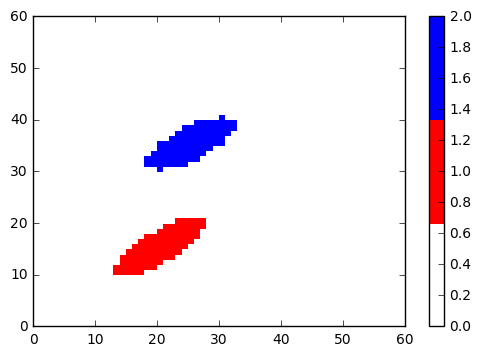

In [161]:
ew = EnhancedWatershed(20, 1, 80, 80, 80)
labels[0] = ew.label(grid[0])
cmap = ListedColormap(["white", "red", "blue"])
plt.pcolormesh(x,y, labels[0], cmap=cmap)
plt.colorbar()

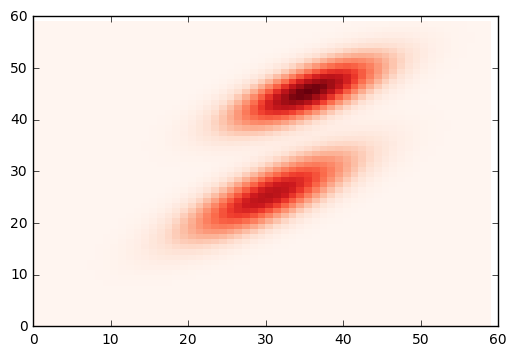

In [162]:
mvn1b = multivariate_normal(mean=[20 + 10, 15 + 10], cov=np.array([[50, 30], [30, 30]]))
mvn2b = multivariate_normal(mean=[25 + 10, 35 + 10], cov=np.array([[40, 20], [20, 20]]))
grid[1] = 10000 * mvn1b.pdf(coords) + 10000 * mvn2b.pdf(coords)
plt.pcolormesh(x, y, grid[1], cmap="Reds")

(0, 80)

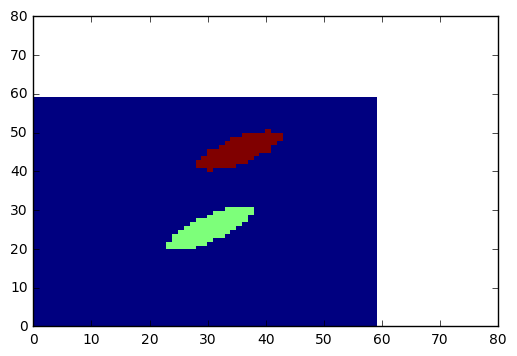

In [163]:
labels[1] = ew.label(grid[1])
plt.pcolormesh(x,y, labels[1])
plt.xlim(0, 80)
plt.ylim(0, 80)

In [164]:
storm_objs = extract_storm_objects(labels, grid, x, y, np.array([0, 1]))
out_storms = track_storms(storm_objs, np.array([0, 1]), [shifted_centroid_distance], np.array([30]), np.array([1]))
print(out_storms)

[<hagelslag.processing.STObject.STObject object at 0x12fd6dcc0>, <hagelslag.processing.STObject.STObject object at 0x12fd6def0>]


/Users/dgagne/anaconda3/lib/python3.5/site-packages/hagelslag-0.2-py3.5.egg/hagelslag/processing/STObject.py:255: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/dgagne/anaconda3/lib/python3.5/site-packages/hagelslag-0.2-py3.5.egg/hagelslag/processing/STObject.py:256: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/dgagne/anaconda3/lib/python3.5/site-packages/hagelslag-0.2-py3.5.egg/hagelslag/processing/STObject.py:257: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


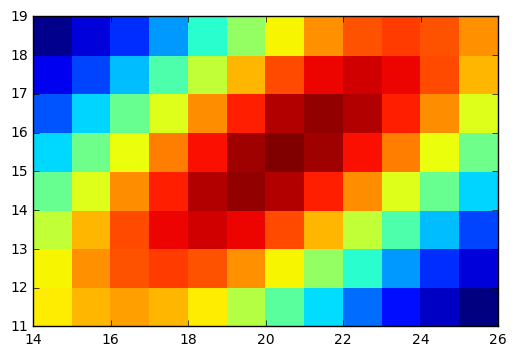

In [158]:
plt.pcolormesh(storm_objs[0][0].x[0], storm_objs[0][0].y[0], storm_objs[0][0].timesteps[0], snap=False)

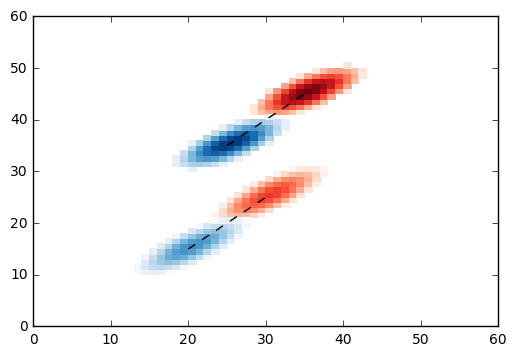

In [170]:
plt.pcolormesh(x, y, np.ma.array(grid[1], mask=labels[1] == 0), cmap="Reds")
plt.pcolormesh(x, y, np.ma.array(grid[0], mask=labels[0] == 0), cmap="Blues")

plt.plot(*out_storms[0].trajectory(), 'k--')
plt.plot(*out_storms[1].trajectory(), 'k--')

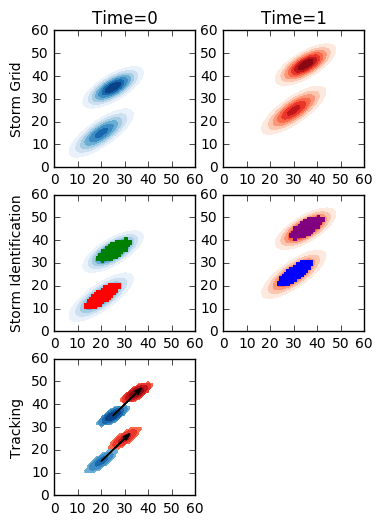

In [169]:
conts = np.arange(10, 90, 10)
plt.figure(figsize=(4, 6))

plt.subplot(3, 2, 1)
plt.contourf(x, y, grid[0], conts, cmap="Blues")
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.title("Time=0")
plt.ylabel("Storm Grid")

plt.subplot(3, 2, 2)
plt.contourf(x, y, grid[1], conts, cmap="Reds")
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.title("Time=1")

plt.subplot(3, 2, 3)
plt.ylabel("Storm Identification")
plt.contourf(x, y, grid[0], conts, cmap="Blues")
cmap_1 = ListedColormap(["red", "green"])
plt.pcolormesh(x,y, np.ma.array(labels[0], mask=labels[0]==0), cmap=cmap_1)
plt.xlim(0, 60)
plt.ylim(0, 60)

plt.subplot(3,2,4)
cmap_2 = ListedColormap(["blue", "purple"])
plt.contourf(x, y, grid[1], conts, cmap="Reds")
plt.pcolormesh(x,y, np.ma.array(labels[1], mask=labels[1] == 0), cmap=cmap_2)
plt.xlim(0, 60)
plt.ylim(0, 60)

plt.subplot(3,2,5)
plt.ylabel("Tracking")
plt.contourf(x, y, np.ma.array(grid[1], mask=labels[1] == 0), conts, cmap="Reds")
plt.contourf(x, y, np.ma.array(grid[0], mask=labels[0] == 0), conts, cmap="Blues")
storm_1_traj = out_storms[0].trajectory().T
storm_2_traj = out_storms[1].trajectory().T
plt.arrow(*storm_1_traj[0], *(storm_1_traj[1] - storm_1_traj[0]), width=0.1, color='k')
plt.arrow(*storm_2_traj[0], *(storm_2_traj[1] - storm_2_traj[0]), width=0.1, color='k')
plt.xlim(0, 60)
plt.ylim(0, 60)

plt.savefig("storm_tracking_demo.pdf", bbox_inches="tight")

In [130]:
storm_1_traj

array([[ 20.00000346,  30.00000346],
       [ 15.00000844,  25.00000844]])